In [2]:
# Ecos
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
class Grid_World:
    def __init__(self, n_rows, n_cols, start_position, wall, rewards, actions):
        grid = np.zeros(n_rows * n_cols).reshape(n_rows, n_cols)
        grid[wall] = None
        for k, v in rewards.items():
            grid[k] = v
            
        self.n_rows = n_rows
        self.n_cols = n_cols
        self.start_position = start_position
        self.wall = wall
        self.current_state = start_position
        self.rewards = rewards
        self.actions = actions
        self.all_states = actions.keys()
        self.all_actions = actions.values()
        self.grid = grid
        self.non_terminal_states = actions.keys()
    
    def apply_action(self, action):
        if action in self.actions[self.current_state]:
            i, j = self.current_state[0], self.current_state[1]
            if action == "U":
                i -= 1
                
            elif action == "D":
                i += 1
                
            elif action == "L":
                j -= 1
                
            elif action == "R":
                j += 1
                
        self.current_state = (i, j)
        
    def get_next_state(self, s, a):
        i, j = s[0], s[1]
        if a in actions[(i, j)]:
            if a == "U":
                i -= 1
                
            elif a == "D":
                i += 1
                
            elif a == "L":
                j -= 1
                
            elif a == "R":
                j += 1
                
        return i, j
        
    def current_value(self):
        return self.grid[self.current_state[0], self.current_state[1]]
        
    def is_game_over(self):
        return self.current_state in self.rewards
    
    def reset(self, start_position=None):
        if start_position == None:
            self.current_state = self.start_position
        else:
            self.current_state = start_position
            
    def grid_values(self, values):
        self.grid_val = self.grid.copy()
        for key, val in values.items():
            self.grid_val[key] = val
            
        self.grid_val[wall] = np.nan
        
        for key, val in rewards.items():
            self.grid_val[key] = np.nan

In [7]:
def ploy_episode():
    rand_idx = np.random.choice(range(len(actions)))
    rand_start = list(actions.keys())[rand_idx]
    env.reset(rand_start)
    states = [rand_start]
    rewards_collected = [0]
    while True:   
        a = policy[env.current_state]
        env.apply_action(a)
        
        states.append(env.current_state)
        if env.current_state in rewards:
            rewards_collected.append(rewards[env.current_state])

        else:
            rewards_collected.append(0)

        if env.is_game_over():
            break
            
    return states, rewards_collected

# Policy One

In [8]:
rewards = {
    (0, 3):1, 
    (1, 3):-1
}

actions = {
    (0, 0):("D", "R"),
    (0, 1):("L", "R"),
    (0, 2):("L", "R", "D"),
    (1, 0):("U", "D"), 
    (1, 2):("U", "D", "R"),
    (2, 0):("U", "R"),
    (2, 1):("L", "R"),
    (2, 2):("L", "U", "R"),
    (2, 3):("U", "L")
}

policy = {
    (2, 0):"U",
    (1, 0):"U",
    (0, 0):"R",
    (0, 1):"R",
    (0, 2):"R",
    (1, 2):"U",
    (2, 1):"R",
    (2, 2):"U",
    (2, 3):"L"
}

n_rows = 3
n_cols = 4
wall = (1, 1)
start_position = (2, 0)
threshold = 10e-3
gamma = .9

env = Grid_World(n_rows, n_cols, start_position, wall, rewards, actions)

In [9]:
env.grid

array([[ 0.,  0.,  0.,  1.],
       [ 0., nan,  0., -1.],
       [ 0.,  0.,  0.,  0.]])

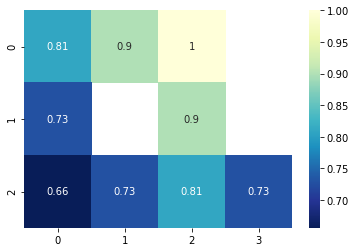

In [22]:
# Initialize values as 0 and [] for all states
v = {}
returns = {}
for rows in range(n_rows):
    for cols in range(n_cols):
        # if it is not terminal state
        if (rows, cols) in env.actions:
            returns[(rows, cols)] = []
            
        # values for terminal states should be zero
        else:
            v[(rows, cols)] = 0
            
for t in range(1000):
    states, rewards_collected = ploy_episode()
    G = 0
    T = len(states)
    for t in range(T - 2, -1, -1):
        s = states[t]
        r = rewards_collected[t + 1]      
        G = r + gamma * G

    # First visit Monte Carlo
    #if s not in states[:t]:
        if s != states[:t]:
            returns[s].append(G)
            v[s] = np.mean(returns[s])
            
env.grid_values(v)
sns.heatmap(env.grid_val, annot=True, cmap="YlGnBu_r")
plt.show()

# Policy Two (Bad Policy)

In [24]:
policy = {
    (0, 0):"D",
    (0, 1):"L",
    (0, 2):"D",
    (1, 0):"D",
    (1, 2):"R",
    (2, 0):"R",
    (2, 1):"R",
    (2, 2):"R",
    (2, 3):"U"
}

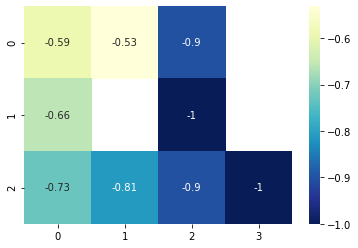

In [25]:
# Initialize values as 0 and [] for all states
v = {}
returns = {}
for rows in range(n_rows):
    for cols in range(n_cols):
        # if it is not terminal state
        if (rows, cols) in env.actions:
            returns[(rows, cols)] = []
            
        # values for terminal states should be zero
        else:
            v[(rows, cols)] = 0
            
for t in range(1000):
    states, rewards_collected = ploy_episode()
    G = 0
    T = len(states)
    for t in range(T - 2, -1, -1):
        s = states[t]
        r = rewards_collected[t + 1]      
        G = r + gamma * G

    # First visit Monte Carlo
    #if s not in states[:t]:
        if s != states[:t]:
            returns[s].append(G)
            v[s] = np.mean(returns[s])
            
env.grid_values(v)
sns.heatmap(env.grid_val, annot=True, cmap="YlGnBu_r")
plt.show()